## Import packages, mount and access data

In [ ]:
!pip install nba_api

# Import packages and mount drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import sklearn as sk
import seaborn as sns
import requests
import warnings

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

# Validate the file location
!ls "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project"

# Adjust pandas settings to display all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 2023_nba_player_stats.csv
 3_man.csv
 5_man.csv
'DSO 579-Final Project Paper.gdoc'
'DSO 579 NBA 5-Man Lineups.gslides'
'DSO 579 NBA Win Prediction.ipynb'
 lineups_data.xlsx
'LV Raiders - Jonathan Meeting Notes 11 11 24.gdoc'
 manual_lineups.xlsx
'Match_up_and_date (1).gsheet'
 Match_up_and_date.csv
 Match_up_and_date.gsheet
 merged_data.xlsx
'NBA 23-24 Season Data.gsheet'
'NBA 23-24 Season Data - Lakers.csv'
'nba 3-man_dummy_combo.ipynb'
'nba 3-man_player_combo.ipynb'
'nba 5-man DEF.ipynb'
'nba 5-man_dummy_combo.ipynb'
'nba 5-man no dummy.ipynb'
'nba 5-man_player_combo.ipynb'
 nba_lineups.ipynb
'NBA Player Performance Win Prediction Proposal.gdoc'
'NBA Players Dataset 2023.zip'
'Play making nba 5-man.ipynb'
'Slide Templates'
 X_final_output.xlsx


## Accessing Scraped 5-man Data

In [ ]:
df_dates = pd.read_csv("/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/Match_up_and_date.csv")
df_dates = df_dates.sort_values(by='GAME DATE', ascending= True)
df_dates.head()

MATCH UP   GAME DATE  W/L
81    LAL @ DEN  2023-10-24    0
80  LAL vs. PHX  2023-10-26    1
79    LAL @ SAC  2023-10-29    0
78  LAL vs. ORL  2023-10-30    1
77  LAL vs. LAC  2023-11-01    1

In [ ]:
file_path = "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/5_man.csv"
data = pd.read_csv(file_path)
data.head()

LINEUPS TEAM  GP  MIN  OFFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   

   DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  \
0   129.4   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1   
1   140.0  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3   
2   100.0    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0   
3   160.0   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3   
4   116.7    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0   

   EFG%   TS%    PACE    PIE        DATE  
0  58.6  61.4  103.72   44.1  10/24/2023  
1  15.4  15.4   93.20  -23.5  10/24/2023  
2  77.8  75.9   74.48  106.1  10/24/2023  
3  50.0  50.0   76.69    8.7  10/24/2023  
4  60.0  68.0  115.97   61.8  10/24/2023

In [ ]:
# Ensure DATE format matches between the two dataframes
df_dates['GAME DATE'] = pd.to_datetime(df_dates['GAME DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract only the opposing team's name from the MATCH UP column
df_dates['OPPOSING TEAM'] = df_dates['MATCH UP'].str.split(' ').str[-1]

# Merge the dataframes on the DATE columns
combined_df = pd.merge(
    data,
    df_dates[['GAME DATE', 'OPPOSING TEAM', 'W/L']],  # Include relevant columns
    left_on='DATE',
    right_on='GAME DATE',
    how='left'
)

# Drop unnecessary GAME DATE column if needed
combined_df.drop(columns=['GAME DATE'], inplace=True)

# Print the combined DataFrame
combined_df

LINEUPS TEAM  GP  MIN  OFFRTG  \
0     L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1     A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2     L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3     L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4     A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   
5     A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    2   120.0   
6     A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    2   150.0   
7     D. Russell - R. Hachimura - G. Vincent - C. Re...  LAL   1    2    50.0   
8     L. James - A. Davis - D. Russell - C. Wood - C...  LAL   1    2   200.0   
9     L. James - D. Russell - T. Prince - R. Hachimu...  LAL   1    2   100.0   
10    A. Davis - C. Wood - T. Prince - G. Vincent - ...  LAL   1    1     0.0   
11    A. Davis - D. Russell - C. Wood - G. Vincent -...  LAL   1    1     0.0   
12    A. Davis - D. Russell - C. Wood - T. Prince - ...  LAL   1    1    50.0   
13    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1     0.0   
14    G. Vincent - C. Reddish - J. Hayes - M. Christ...  LAL   1    1   200.0   
15    L. James - A. Davis - C. Wood - C. Reddish - A...  LAL   1    1   200.0   
16    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    1     0.0   
17    L. James - A. Davis - D. Russell - C. Wood - G...  LAL   1    0     0.0   
18    L. James - A. Davis - D. Russell - C. Wood - G...  LAL   1   10   114.3   
19    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   10   109.1   
20    A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    70.0   
21    L. James - A. Davis - C. Wood - G. Vincent - A...  LAL   1    5   133.3   
22    L. James - A. Davis - G. Vincent - C. Reddish ...  LAL   1    3   100.0   
23    L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   114.3   
24    L. James - D. Russell - R. Hachimura - G. Vinc...  LAL   1    3    57.1   
25    A. Davis - C. Wood - G. Vincent - C. Reddish -...  LAL   1    2   100.0   
26    A. Davis - D. Russell - C. Wood - T. Prince - ...  LAL   1    2    33.3   
27    A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    1    75.0   
28    A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    1   100.0   
29    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1     0.0   
30    D. Russell - R. Hachimura - G. Vincent - C. Re...  LAL   1    1    50.0   
31    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    1     0.0   
32    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   15    84.8   
33    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1    9   115.0   
34    L. James - D. Russell - R. Hachimura - G. Vinc...  LAL   1    6   138.5   
35    A. Davis - C. Wood - T. Prince - R. Hachimura ...  LAL   1    4   120.0   
36    L. James - D. Russell - C. Wood - T. Prince - ...  LAL   1    4   150.0   
37    A. Davis - C. Wood - T. Prince - G. Vincent - ...  LAL   1    3   112.5   
38    A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    2   150.0   
39    A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    2   100.0   
40    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    2    50.0   
41    A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    1   100.0   
42    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1    75.0   
43    L. James - A. Davis - C. Wood - T. Prince - A....  LAL   1    1     0.0   
44    L. James - A. Davis - D. Russell - C. Wood - T...  LAL   1    1   300.0   
45    L. James - A. Davis - D. Russell - R. Hachimur...  LAL   1    1   133.3   
46    L. James - A. Davis - T. Prince - G. Vincent -...  LAL   1    0     0.0   
47    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   13    83.9   
48    L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    6   107.1  

In [ ]:
duplicates = combined_df[combined_df.duplicated(keep=False)]
duplicates

Empty DataFrame
Columns: [LINEUPS, TEAM, GP, MIN, OFFRTG, DEFRTG, NETRTG, AST%, AST/TO, AST RATIO, OREB%, DREB%, REB%, TO RATIO, EFG%, TS%, PACE, PIE, DATE, OPPOSING TEAM, W/L]
Index: []

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LINEUPS        1164 non-null   object        
 1   TEAM           1164 non-null   object        
 2   GP             1164 non-null   int64         
 3   MIN            1164 non-null   int64         
 4   OFFRTG         1164 non-null   float64       
 5   DEFRTG         1164 non-null   float64       
 6   NETRTG         1164 non-null   float64       
 7   AST%           1164 non-null   float64       
 8   AST/TO         1164 non-null   float64       
 9   AST RATIO      1164 non-null   float64       
 10  OREB%          1164 non-null   float64       
 11  DREB%          1164 non-null   float64       
 12  REB%           1164 non-null   float64       
 13  TO RATIO       1164 non-null   float64       
 14  EFG%           1164 non-null   float64       
 15  TS%            1164 n

In [ ]:
combined_df.describe()

GP          MIN       OFFRTG       DEFRTG       NETRTG  \
count  1164.0  1164.000000  1164.000000  1164.000000  1164.000000   
mean      1.0     3.414089   101.086942   108.250172    -7.163660   
min       1.0     0.000000     0.000000     0.000000  -400.000000   
25%       1.0     1.000000    66.700000    66.700000   -53.150000   
50%       1.0     2.000000   100.000000   107.400000     0.000000   
75%       1.0     4.000000   137.500000   144.500000    39.775000   
max       1.0    27.000000   300.000000   400.000000   300.000000   
std       0.0     3.781478    63.726628    64.722319    89.816489   

              AST%       AST/TO    AST RATIO        OREB%        DREB%  \
count  1164.000000  1164.000000  1164.000000  1164.000000  1164.000000   
mean     50.601632     0.831031    15.520962    19.158591    62.171478   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000    33.300000   
50%      50.000000     0.000000    16.700000     0.000000    70.700000   
75%     100.000000     1.000000    25.000000    33.300000   100.000000   
max     100.000000    13.000000    50.000000   100.000000   100.000000   
std      39.534934     1.411589    12.816507    27.281388    37.971190   

              REB%     TO RATIO         EFG%          TS%         PACE  \
count  1164.000000  1164.000000  1164.000000  1164.000000  1164.000000   
mean     45.822852     0.124914    50.998282    55.395017   130.926916   
min       0.000000     0.000000     0.000000     0.000000    59.380000   
25%      33.300000     0.000000    28.600000    34.700000    97.300000   
50%      50.000000     0.100000    50.000000    58.000000   106.670000   
75%      60.000000     0.200000    70.950000    75.000000   120.000000   
max     100.000000     1.000000   150.000000   150.000000  7200.000000   
std      28.146013     0.162254    35.428332    33.529722   230.047812   

               PIE                           DATE          W/L  
count  1164.000000                           1164  1164.000000  
mean     41.290034  2024-01-17 02:18:33.402061824     0.576460  
min   -1100.000000            2023-10-24 00:00:00     0.000000  
25%      16.700000            2023-12-02 00:00:00     0.000000  
50%      48.700000            2024-01-15 00:00:00     1.000000  
75%      73.400000            2024-03-02 00:00:00     1.000000  
max     700.000000            2024-04-14 00:00:00     1.000000  
std      95.689384                            NaN     0.494332

## Data Cleaning

In [ ]:
combined_df.head()

LINEUPS TEAM  GP  MIN  OFFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   

   DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  \
0   129.4   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1   
1   140.0  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3   
2   100.0    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0   
3   160.0   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3   
4   116.7    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0   

   EFG%   TS%    PACE    PIE       DATE OPPOSING TEAM  W/L  
0  58.6  61.4  103.72   44.1 2023-10-24           DEN    0  
1  15.4  15.4   93.20  -23.5 2023-10-24           DEN    0  
2  77.8  75.9   74.48  106.1 2023-10-24           DEN    0  
3  50.0  50.0   76.69    8.7 2023-10-24           DEN    0  
4  60.0  68.0  115.97   61.8 2023-10-24           DEN    0

In [ ]:
#To list the columns in the data
combined_df.columns

Index(['LINEUPS', 'TEAM', 'GP', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%',
       'TS%', 'PACE', 'PIE', 'DATE', 'OPPOSING TEAM', 'W/L'],
      dtype='object')

In [ ]:
#List of columns
manual_drop = ["TEAM", "GP", "DATE", "OPPOSING TEAM"]

# Drop the specified columns
cleaned_data = combined_df.drop(columns=manual_drop, errors='ignore')
cleaned_data.head()

LINEUPS  MIN  OFFRTG  DEFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...   16   117.1   129.4   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...    5    40.0   140.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...    5   187.5   100.0   
3  L. James - D. Russell - C. Wood - G. Vincent -...    3   100.0   160.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...    2   133.3   116.7   

   NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  \
0   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1  58.6  61.4   
1  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3  15.4  15.4   
2    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0  77.8  75.9   
3   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3  50.0  50.0   
4    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0  60.0  68.0   

     PACE    PIE  W/L  
0  103.72   44.1    0  
1   93.20  -23.5    0  
2   74.48  106.1    0  
3   76.69    8.7    0  
4  115.97   61.8    0

In [ ]:
# Step 2: Initialize a set to store unique player names
unique_players = set()

# Step 3: Iterate through the LINEUPS column, split on ' - ', and add names to the set
cleaned_data['LINEUPS'].str.split(' - ').apply(lambda lineup: unique_players.update(lineup))

unique_players

{'A. Davis',
 'A. Fudge',
 'A. Reaves',
 'C. Castleton',
 'C. Reddish',
 'C. Wood',
 'D. Hodge',
 'D. Russell',
 'D. Windler',
 'G. Vincent',
 'H. Giles III',
 'J. Hayes',
 'J. Hood-Schifino',
 'J. Vanderbilt',
 'L. James',
 'M. Christie',
 'M. Lewis',
 'R. Hachimura',
 'S. Dinwiddie',
 'S. Mays',
 'T. Prince'}

In [ ]:
unique_players = set()
cleaned_data['LINEUPS'].str.split(' - ').apply(lambda lineup: unique_players.update(lineup))
unique_players = sorted(unique_players)

# Step 3: Create binary columns for each player
for player in unique_players:
    cleaned_data[player] = cleaned_data['LINEUPS'].apply(lambda lineup: 1 if player in lineup.split(' - ') else 0)

cleaned_data

LINEUPS  MIN  OFFRTG  DEFRTG  \
0     L. James - A. Davis - D. Russell - T. Prince -...   16   117.1   129.4   
1     A. Davis - T. Prince - R. Hachimura - G. Vince...    5    40.0   140.0   
2     L. James - D. Russell - C. Wood - G. Vincent -...    5   187.5   100.0   
3     L. James - D. Russell - C. Wood - G. Vincent -...    3   100.0   160.0   
4     A. Davis - C. Wood - T. Prince - C. Reddish - ...    2   133.3   116.7   
5     A. Davis - D. Russell - R. Hachimura - G. Vinc...    2   120.0   140.0   
6     A. Davis - D. Russell - T. Prince - R. Hachimu...    2   150.0   140.0   
7     D. Russell - R. Hachimura - G. Vincent - C. Re...    2    50.0    50.0   
8     L. James - A. Davis - D. Russell - C. Wood - C...    2   200.0    60.0   
9     L. James - D. Russell - T. Prince - R. Hachimu...    2   100.0    33.3   
10    A. Davis - C. Wood - T. Prince - G. Vincent - ...    1     0.0   133.3   
11    A. Davis - D. Russell - C. Wood - G. Vincent -...    1     0.0   300.0   
12    A. Davis - D. Russell - C. Wood - T. Prince - ...    1    50.0   200.0   
13    A. Davis - R. Hachimura - G. Vincent - C. Redd...    1     0.0     0.0   
14    G. Vincent - C. Reddish - J. Hayes - M. Christ...    1   200.0   133.3   
15    L. James - A. Davis - C. Wood - C. Reddish - A...    1   200.0   200.0   
16    L. James - D. Russell - G. Vincent - C. Reddis...    1     0.0   300.0   
17    L. James - A. Davis - D. Russell - C. Wood - G...    0     0.0     0.0   
18    L. James - A. Davis - D. Russell - C. Wood - G...   10   114.3    23.8   
19    L. James - A. Davis - D. Russell - T. Prince -...   10   109.1   117.4   
20    A. Davis - T. Prince - R. Hachimura - G. Vince...    5    70.0   140.0   
21    L. James - A. Davis - C. Wood - G. Vincent - A...    5   133.3    66.7   
22    L. James - A. Davis - G. Vincent - C. Reddish ...    3   100.0    66.7   
23    L. James - D. Russell - C. Wood - G. Vincent -...    3   114.3    50.0   
24    L. James - D. Russell - R. Hachimura - G. Vinc...    3    57.1   150.0   
25    A. Davis - C. Wood - G. Vincent - C. Reddish -...    2   100.0   233.3   
26    A. Davis - D. Russell - C. Wood - T. Prince - ...    2    33.3   150.0   
27    A. Davis - D. Russell - R. Hachimura - G. Vinc...    1    75.0   100.0   
28    A. Davis - D. Russell - T. Prince - R. Hachimu...    1   100.0   100.0   
29    A. Davis - R. Hachimura - G. Vincent - C. Redd...    1     0.0    66.7   
30    D. Russell - R. Hachimura - G. Vincent - C. Re...    1    50.0     0.0   
31    L. James - D. Russell - G. Vincent - C. Reddis...    1     0.0   133.3   
32    L. James - A. Davis - D. Russell - T. Prince -...   15    84.8   131.3   
33    L. James - A. Davis - D. Russell - T. Prince -...    9   115.0   125.0   
34    L. James - D. Russell - R. Hachimura - G. Vinc...    6   138.5    76.9   
35    A. Davis - C. Wood - T. Prince - R. Hachimura ...    4   120.0    90.0   
36    L. James - D. Russell - C. Wood - T. Prince - ...    4   150.0   100.0   
37    A. Davis - C. Wood - T. Prince - G. Vincent - ...    3   112.5    85.7   
38    A. Davis - D. Russell - R. Hachimura - G. Vinc...    2   150.0    60.0   
39    A. Davis - T. Prince - R. Hachimura - G. Vince...    2   100.0   125.0   
40    L. James - D. Russell - G. Vincent - C. Reddis...    2    50.0   225.0   
41    A. Davis - D. Russell - T. Prince - R. Hachimu...    1   100.0   266.7   
42    A. Davis - R. Hachimura - G. Vincent - C. Redd...    1    75.0   200.0   
43    L. James - A. Davis - C. Wood - T. Prince - A....    1     0.0    25.0   
44    L. James - A. Davis - D. Russell - C. Wood - T...    1   300.0     0.0   
45    L. James - A. Davis - D. Russell - R. Hachimur...    1   133.3     0.0   
46    L. James - A. Davis - T. Prince - G. Vincent -...    0     0.0     0.0   
47    L. James - A. Davis - D. Russell - T. Prince -...   13    83.9   100.0   
48    L. James - D. Russell - C. Wood - G. Vincent -...    6   107.1   107.1   
49    A. Davis - D. Russell - T. Prince - C. Red

In [ ]:
dummied_data = cleaned_data.drop(columns="LINEUPS", errors='ignore')
dummied_data.head()
dummied_data.shape

(1164, 37)

In [ ]:
dummied_data.rename(columns={'W/L': 'WIN'}, inplace=True)
dummied_data.head()

MIN  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  \
0   16   117.1   129.4   -12.3  64.3    3.00       19.1   17.6   68.8  42.4   
1    5    40.0   140.0  -100.0  50.0    0.33        5.9   54.5   66.7  57.1   
2    5   187.5   100.0    87.5  66.7    0.00       25.0  100.0   50.0  75.0   
3    3   100.0   160.0   -60.0  50.0    1.00       16.7   50.0  100.0  66.7   
4    2   133.3   116.7    16.7  66.7    0.00       25.0    0.0   75.0  50.0   

   TO RATIO  EFG%   TS%    PACE    PIE  WIN  A. Davis  A. Fudge  A. Reaves  \
0       0.1  58.6  61.4  103.72   44.1    0         1         0          1   
1       0.3  15.4  15.4   93.20  -23.5    0         1         0          1   
2       0.0  77.8  75.9   74.48  106.1    0         0         0          0   
3       0.3  50.0  50.0   76.69    8.7    0         0         0          0   
4       0.0  60.0  68.0  115.97   61.8    0         1         0          1   

   C. Castleton  C. Reddish  C. Wood  D. Hodge  D. Russell  D. Windler  \
0             0           0        0         0           1           0   
1             0           0        0         0           0           0   
2             0           1        1         0           1           0   
3             0           0        1         0           1           0   
4             0           1        1         0           0           0   

   G. Vincent  H. Giles III  J. Hayes  J. Hood-Schifino  J. Vanderbilt  \
0           0             0         0                 0              0   
1           1             0         0                 0              0   
2           1             0         0                 0              0   
3           1             0         1                 0              0   
4           0             0         0                 0              0   

   L. James  M. Christie  M. Lewis  R. Hachimura  S. Dinwiddie  S. Mays  \
0         1            0         0             0             0        0   
1         0            0         0             1             0        0   
2         1            0         0             0             0        0   
3         1            0         0             0             0        0   
4         0            0         0             0             0        0   

   T. Prince  
0          1  
1          1  
2          0  
3          0  
4          1

In [ ]:
dummied_data.columns

Index(['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO',
       'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%', 'PACE', 'PIE',
       'WIN', 'A. Davis', 'A. Fudge', 'A. Reaves', 'C. Castleton',
       'C. Reddish', 'C. Wood', 'D. Hodge', 'D. Russell', 'D. Windler',
       'G. Vincent', 'H. Giles III', 'J. Hayes', 'J. Hood-Schifino',
       'J. Vanderbilt', 'L. James', 'M. Christie', 'M. Lewis', 'R. Hachimura',
       'S. Dinwiddie', 'S. Mays', 'T. Prince'],
      dtype='object')

In [ ]:
numericals = dummied_data[['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'WIN']].corr()
numericals

MIN    OFFRTG    DEFRTG    NETRTG      AST%    AST/TO  \
MIN        1.000000  0.163625  0.060856  0.072234  0.261367  0.574541   
OFFRTG     0.163625  1.000000  0.022187  0.693536  0.438879  0.188482   
DEFRTG     0.060856  0.022187  1.000000 -0.704858  0.064144  0.044697   
NETRTG     0.072234  0.693536 -0.704858  1.000000  0.265175  0.101523   
AST%       0.261367  0.438879  0.064144  0.265175  1.000000  0.349122   
AST/TO     0.574541  0.188482  0.044697  0.101523  0.349122  1.000000   
AST RATIO  0.242646  0.639759  0.027166  0.434352  0.866916  0.363546   
OREB%      0.095267  0.152296  0.033131  0.084198  0.002304  0.045121   
DREB%      0.211594  0.099169 -0.316757  0.298631  0.212044  0.167798   
REB%       0.112453  0.246292 -0.282439  0.378290  0.158391  0.113070   
TO RATIO   0.024372 -0.231599  0.013105 -0.173773 -0.013077  0.083205   
EFG%       0.159885  0.801586  0.056951  0.527703  0.537146  0.242736   
TS%        0.139119  0.865539  0.063077  0.568663  0.471820  0.211550   
PACE      -0.102760 -0.127264 -0.131096  0.004173 -0.124751 -0.065058   
PIE        0.087410  0.409079 -0.245123  0.466883  0.243785  0.101422   
WIN       -0.000853  0.047664 -0.125580  0.124301  0.010969  0.020897   

           AST RATIO     OREB%     DREB%      REB%  TO RATIO      EFG%  \
MIN         0.242646  0.095267  0.211594  0.112453  0.024372  0.159885   
OFFRTG      0.639759  0.152296  0.099169  0.246292 -0.231599  0.801586   
DEFRTG      0.027166  0.033131 -0.316757 -0.282439  0.013105  0.056951   
NETRTG      0.434352  0.084198  0.298631  0.378290 -0.173773  0.527703   
AST%        0.866916  0.002304  0.212044  0.158391 -0.013077  0.537146   
AST/TO      0.363546  0.045121  0.167798  0.113070  0.083205  0.242736   
AST RATIO   1.000000 -0.043630  0.172500  0.172414 -0.104874  0.702569   
OREB%      -0.043630  1.000000  0.042372  0.484444  0.086864 -0.019586   
DREB%       0.172500  0.042372  1.000000  0.700376  0.079987  0.157825   
REB%        0.172414  0.484444  0.700376  1.000000  0.157394  0.262381   
TO RATIO   -0.104874  0.086864  0.079987  0.157394  1.000000  0.006764   
EFG%        0.702569 -0.019586  0.157825  0.262381  0.006764  1.000000   
TS%         0.625045 -0.038501  0.151972  0.255557 -0.009019  0.902043   
PACE       -0.119039 -0.064942 -0.112724 -0.103093 -0.051161 -0.133690   
PIE         0.301016  0.025894  0.121515  0.177808 -0.054341  0.341138   
WIN         0.040055  0.021855  0.012883  0.066123  0.029831  0.053184   

                TS%      PACE       PIE       WIN  
MIN        0.139119 -0.102760  0.087410 -0.000853  
OFFRTG     0.865539 -0.127264  0.409079  0.047664  
DEFRTG     0.063077 -0.131096 -0.245123 -0.125580  
NETRTG     0.568663  0.004173  0.466883  0.124301  
AST%       0.471820 -0.124751  0.243785  0.010969  
AST/TO     0.211550 -0.065058  0.101422  0.020897  
AST RATIO  0.625045 -0.119039  0.301016  0.040055  
OREB%     -0.038501 -0.064942  0.025894  0.021855  
DREB%      0.151972 -0.112724  0.121515  0.012883  
REB%       0.255557 -0.103093  0.177808  0.066123  
TO RATIO  -0.009019 -0.051161 -0.054341  0.029831  
EFG%       0.902043 -0.133690  0.341138  0.053184  
TS%        1.000000 -0.121187  0.387303  0.048621  
PACE      -0.121187  1.000000 -0.017657 -0.021028  
PIE        0.387303 -0.017657  1.000000  0.035354  
WIN        0.048621 -0.021028  0.035354  1.000000

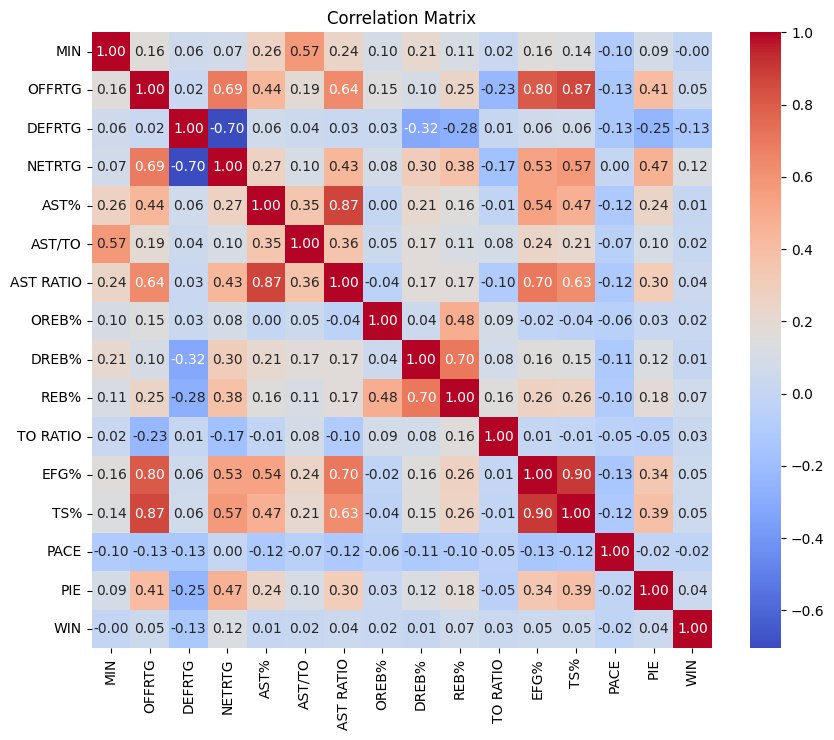

In [ ]:
import seaborn as sns
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numericals, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
yes = dummied_data[dummied_data["WIN"] == 1]
no = dummied_data[dummied_data["WIN"] == 0]

In [ ]:
filtered_data = dummied_data

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Split numerical and categorical variables
numerical_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']
#categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Plot the distribution of numerical features
for feature in numerical_features:
    fig = px.histogram(filtered_data, x=feature, title=f"Distribution of {feature}", nbins=50)
    fig.show()

    # Plot the distribution of numerical features By Heart Disease
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=yes[feature], nbinsx=50, opacity=0.5, name='Yes', marker_color='red' ))
    fig.add_trace(go.Histogram(x=no[feature], nbinsx=50, opacity=0.5, name='No', marker_color='blue' ))
    fig.update_layout(title=f"Distribution of {feature} By Win",
                      xaxis_title=feature, yaxis_title="Count", barmode='group')
    fig.show()

In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
X = filtered_data.drop(columns=['WIN'])  # Features
y = filtered_data['WIN']  # Target

# Identify categorical and continuous features
categorical_features = ['A. Davis', 'A. Fudge', 'A. Reaves', 'C. Castleton',
       'C. Reddish', 'C. Wood', 'D. Hodge', 'D. Russell', 'D. Windler',
       'G. Vincent', 'H. Giles III', 'J. Hayes', 'J. Hood-Schifino',
       'J. Vanderbilt', 'L. James', 'M. Christie', 'M. Lewis', 'R. Hachimura',
       'S. Dinwiddie', 'S. Mays', 'T. Prince']
continuous_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features)])

# Apply transformations to the numerical features
X_transformed = preprocessor.fit_transform(X)

# Create the DataFrame for transformed numerical features
X_transformed_df = pd.DataFrame(X_transformed, columns=continuous_features, index=X.index)

# Bring back the categorical features
X_categorical = X[categorical_features]

# Concatenate the numerical and categorical DataFrames
X_final = pd.concat([X_transformed_df, X_categorical], axis=1)

# Display the final DataFrame
X_final.head()

MIN    OFFRTG    DEFRTG    NETRTG      AST%    AST/TO  AST RATIO  \
0  3.329735  0.251385  0.326918 -0.057212  0.346637  1.537205   0.279372   
1  0.419569 -0.958990  0.490765 -1.034067 -0.015224 -0.355094  -0.750992   
2  0.419569  1.356579 -0.127525  1.054421  0.407369 -0.588973   0.739914   
3 -0.109552 -0.017064  0.799911 -0.588523 -0.015224  0.119753   0.092033   
4 -0.374112  0.505705  0.130611  0.265808  0.407369 -0.588973   0.739914   

      OREB%     DREB%      REB%  TO RATIO      EFG%       TS%      PACE  \
0 -0.057155  0.174642 -0.121663 -0.153616  0.214658  0.179171 -0.118317   
1  1.295997  0.119313  0.400838  1.079550 -1.005229 -1.193336 -0.164066   
2  2.964518 -0.320683  1.037081 -0.770199  0.756830  0.611809 -0.245476   
3  1.130979  0.996671  0.742063  1.079550 -0.028190 -0.160972 -0.235865   
4 -0.702561  0.337994  0.148474 -0.770199  0.254192  0.376096 -0.065044   

        PIE  A. Davis  A. Fudge  A. Reaves  C. Castleton  C. Reddish  C. Wood  \
0  0.029378         1         0          1             0           0        0   
1 -0.677378         1         0          1             0           0        0   
2  0.677586         0         0          0             0           1        1   
3 -0.340728         0         0          0             0           0        1   
4  0.214431         1         0          1             0           1        1   

   D. Hodge  D. Russell  D. Windler  G. Vincent  H. Giles III  J. Hayes  \
0         0           1           0           0             0         0   
1         0           0           0           1             0         0   
2         0           1           0           1             0         0   
3         0           1           0           1             0         1   
4         0           0           0           0             0         0   

   J. Hood-Schifino  J. Vanderbilt  L. James  M. Christie  M. Lewis  \
0                 0              0         1            0         0   
1                 0              0         0            0         0   
2                 0              0         1            0         0   
3                 0              0         1            0         0   
4                 0              0         0            0         0   

   R. Hachimura  S. Dinwiddie  S. Mays  T. Prince  
0             0             0        0          1  
1             1             0        0          1  
2             0             0        0          0  
3             0             0        0          0  
4             0             0        0          1

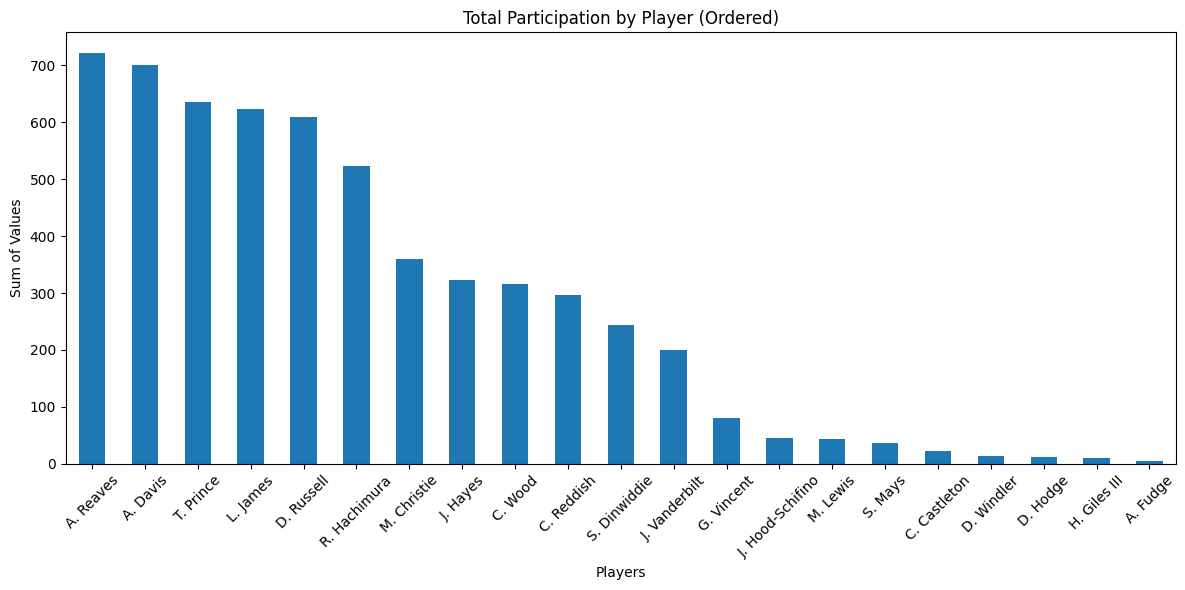

In [ ]:
# Calculate the sum for each player column
player_sums = X_final[categorical_features].sum()

# Step 2: Sort the sums in descending order
player_sums = player_sums.sort_values(ascending=False)

# Step 3: Plot the results as a bar chart
plt.figure(figsize=(12, 6))
player_sums.plot(kind='bar')

# Step 4: Add labels and title
plt.title('Total Participation by Player (Ordered)')
plt.xlabel('Players')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)  # Rotate player names for better readability
plt.tight_layout()

# Step 5: Show the chart
plt.show()

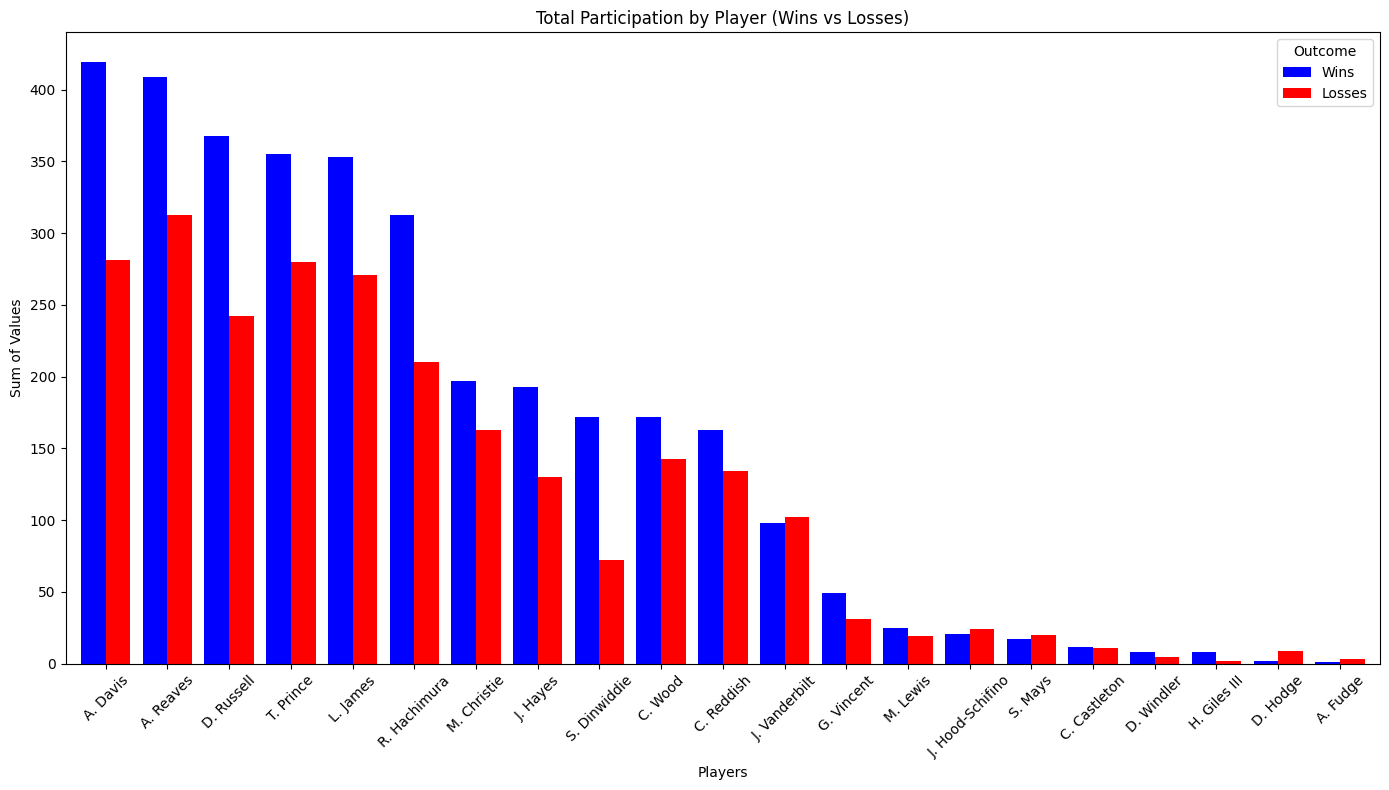

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'WIN' and calculate the sum for each player column
player_sums_win = X_final[y == 1][categorical_features].sum()  # Sums for wins
player_sums_loss = X_final[y == 0][categorical_features].sum()  # Sums for losses

# Combine the sums into a single DataFrame for plotting
player_sums = pd.DataFrame({
    'Wins': player_sums_win,
    'Losses': player_sums_loss
}).sort_values(by='Wins', ascending=False)

# Plot the results
ax = player_sums.plot(
    kind='bar',
    figsize=(14, 8),
    color=['blue', 'red'],
    width=0.8
)

# Add labels and title
plt.title('Total Participation by Player (Wins vs Losses)')
plt.xlabel('Players')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)  # Rotate player names for better readability
plt.legend(title="Outcome")
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
X_final_dropped = X_final.drop(columns=['A. Fudge', 'D. Hodge', 'H. Giles III','D. Windler'])
X_final_dropped.head()

MIN    OFFRTG    DEFRTG    NETRTG      AST%    AST/TO  AST RATIO  \
0  3.329735  0.251385  0.326918 -0.057212  0.346637  1.537205   0.279372   
1  0.419569 -0.958990  0.490765 -1.034067 -0.015224 -0.355094  -0.750992   
2  0.419569  1.356579 -0.127525  1.054421  0.407369 -0.588973   0.739914   
3 -0.109552 -0.017064  0.799911 -0.588523 -0.015224  0.119753   0.092033   
4 -0.374112  0.505705  0.130611  0.265808  0.407369 -0.588973   0.739914   

      OREB%     DREB%      REB%  TO RATIO      EFG%       TS%      PACE  \
0 -0.057155  0.174642 -0.121663 -0.153616  0.214658  0.179171 -0.118317   
1  1.295997  0.119313  0.400838  1.079550 -1.005229 -1.193336 -0.164066   
2  2.964518 -0.320683  1.037081 -0.770199  0.756830  0.611809 -0.245476   
3  1.130979  0.996671  0.742063  1.079550 -0.028190 -0.160972 -0.235865   
4 -0.702561  0.337994  0.148474 -0.770199  0.254192  0.376096 -0.065044   

        PIE  A. Davis  A. Reaves  C. Castleton  C. Reddish  C. Wood  \
0  0.029378         1          1             0           0        0   
1 -0.677378         1          1             0           0        0   
2  0.677586         0          0             0           1        1   
3 -0.340728         0          0             0           0        1   
4  0.214431         1          1             0           1        1   

   D. Russell  G. Vincent  J. Hayes  J. Hood-Schifino  J. Vanderbilt  \
0           1           0         0                 0              0   
1           0           1         0                 0              0   
2           1           1         0                 0              0   
3           1           1         1                 0              0   
4           0           0         0                 0              0   

   L. James  M. Christie  M. Lewis  R. Hachimura  S. Dinwiddie  S. Mays  \
0         1            0         0             0             0        0   
1         0            0         0             1             0        0   
2         1            0         0             0             0        0   
3         1            0         0             0             0        0   
4         0            0         0             0             0        0   

   T. Prince  
0          1  
1          1  
2          0  
3          0  
4          1

In [ ]:
offensive_col = ['DEFRTG', 'DREB%', 'REB%', 'NETRTG','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

defensive_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

playmake_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','DEFRTG', 'DREB%', 'REB%', 'NETRTG'
]

off = X_final_dropped.copy(deep=True)
defe = X_final_dropped.copy(deep=True)
play = X_final_dropped.copy(deep=True)

In [ ]:
offensive_X = off.drop(columns=offensive_col)
defensive_X = defe.drop(columns=defensive_col)
playmake_X = play.drop(columns=playmake_col)
offensive_X.head()

MIN    OFFRTG     OREB%      EFG%       TS%      PACE       PIE  \
0  3.329735  0.251385 -0.057155  0.214658  0.179171 -0.118317  0.029378   
1  0.419569 -0.958990  1.295997 -1.005229 -1.193336 -0.164066 -0.677378   
2  0.419569  1.356579  2.964518  0.756830  0.611809 -0.245476  0.677586   
3 -0.109552 -0.017064  1.130979 -0.028190 -0.160972 -0.235865 -0.340728   
4 -0.374112  0.505705 -0.702561  0.254192  0.376096 -0.065044  0.214431   

   A. Davis  A. Reaves  C. Castleton  C. Reddish  C. Wood  D. Russell  \
0         1          1             0           0        0           1   
1         1          1             0           0        0           0   
2         0          0             0           1        1           1   
3         0          0             0           0        1           1   
4         1          1             0           1        1           0   

   G. Vincent  J. Hayes  J. Hood-Schifino  J. Vanderbilt  L. James  \
0           0         0                 0              0         1   
1           1         0                 0              0         0   
2           1         0                 0              0         1   
3           1         1                 0              0         1   
4           0         0                 0              0         0   

   M. Christie  M. Lewis  R. Hachimura  S. Dinwiddie  S. Mays  T. Prince  
0            0         0             0             0        0          1  
1            0         0             1             0        0          1  
2            0         0             0             0        0          0  
3            0         0             0             0        0          0  
4            0         0             0             0        0          1

In [ ]:
variances = X_final.var()
print(variances.sort_values())

A. Fudge            0.003428
H. Giles III        0.008525
D. Hodge            0.009369
D. Windler          0.011053
C. Castleton        0.019386
S. Mays             0.030803
M. Lewis            0.036403
J. Hood-Schifino    0.037197
G. Vincent          0.064060
J. Vanderbilt       0.142421
S. Dinwiddie        0.165823
C. Reddish          0.190214
C. Wood             0.197554
J. Hayes            0.200662
M. Christie         0.213809
A. Reaves           0.235736
A. Davis            0.239929
R. Hachimura        0.247644
T. Prince           0.248140
L. James            0.248912
D. Russell          0.249636
AST RATIO           1.000860
OREB%               1.000860
DEFRTG              1.000860
DREB%               1.000860
NETRTG              1.000860
AST%                1.000860
TS%                 1.000860
REB%                1.000860
PIE                 1.000860
OFFRTG              1.000860
PACE                1.000860
EFG%                1.000860
MIN                 1.000860
TO RATIO      

#### Check VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Combine your transformed continuous and categorical features
X_combined = pd.concat([X_transformed_df, X[categorical_features]], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_combined.columns
vif_data['VIF'] = [variance_inflation_factor(X_combined.values, i) for i in range(X_combined.shape[1])]

# Display VIF scores
print(vif_data)


             Feature           VIF
0                MIN  1.754021e+00
1             OFFRTG  5.232508e+06
2             DEFRTG  5.397236e+06
3             NETRTG  1.039417e+07
4               AST%  5.102197e+00
5             AST/TO  1.683362e+00
6          AST RATIO  7.610973e+00
7              OREB%  2.624684e+00
8              DREB%  3.067071e+00
9               REB%  4.373650e+00
10          TO RATIO  1.446029e+00
11              EFG%  6.765519e+00
12               TS%  1.063021e+01
13              PACE  1.085749e+00
14               PIE  1.358943e+00
15          A. Davis  3.617653e+00
16          A. Fudge  1.631551e+00
17         A. Reaves  2.901245e+00
18      C. Castleton  1.613427e+00
19        C. Reddish  1.330170e+00
20           C. Wood  1.459891e+00
21          D. Hodge  1.763735e+00
22        D. Russell  2.167039e+00
23        D. Windler  1.357683e+00
24        G. Vincent  1.117543e+00
25      H. Giles III  1.266034e+00
26          J. Hayes  1.932089e+00
27  J. Hood-Schifino

# All Stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final_dropped, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistic Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.644722
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  931
Model:                          Logit   Df Residuals:                      898
Method:                           MLE   Df Model:                           32
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.05369
Time:                        00:43:10   Log-Likelihood:                -600.24
converged:                       True   LL-Null:                       -634.29
Covariance Type:            nonrobust   LLR p-value:                 0.0002054
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3151      2.111     -0.623      0.533      -5.452       2.822
MIN        

### Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.61
Recall (Sensitivity): 0.75
F1 Score: 0.68
AUC-ROC: 0.59
Log Loss: 0.68
Normalized Confusion Matrix: [[0.35353535 0.64646465]
 [0.24626866 0.75373134]]


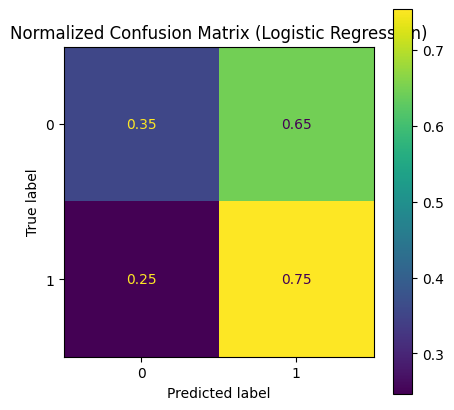

In [ ]:
# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

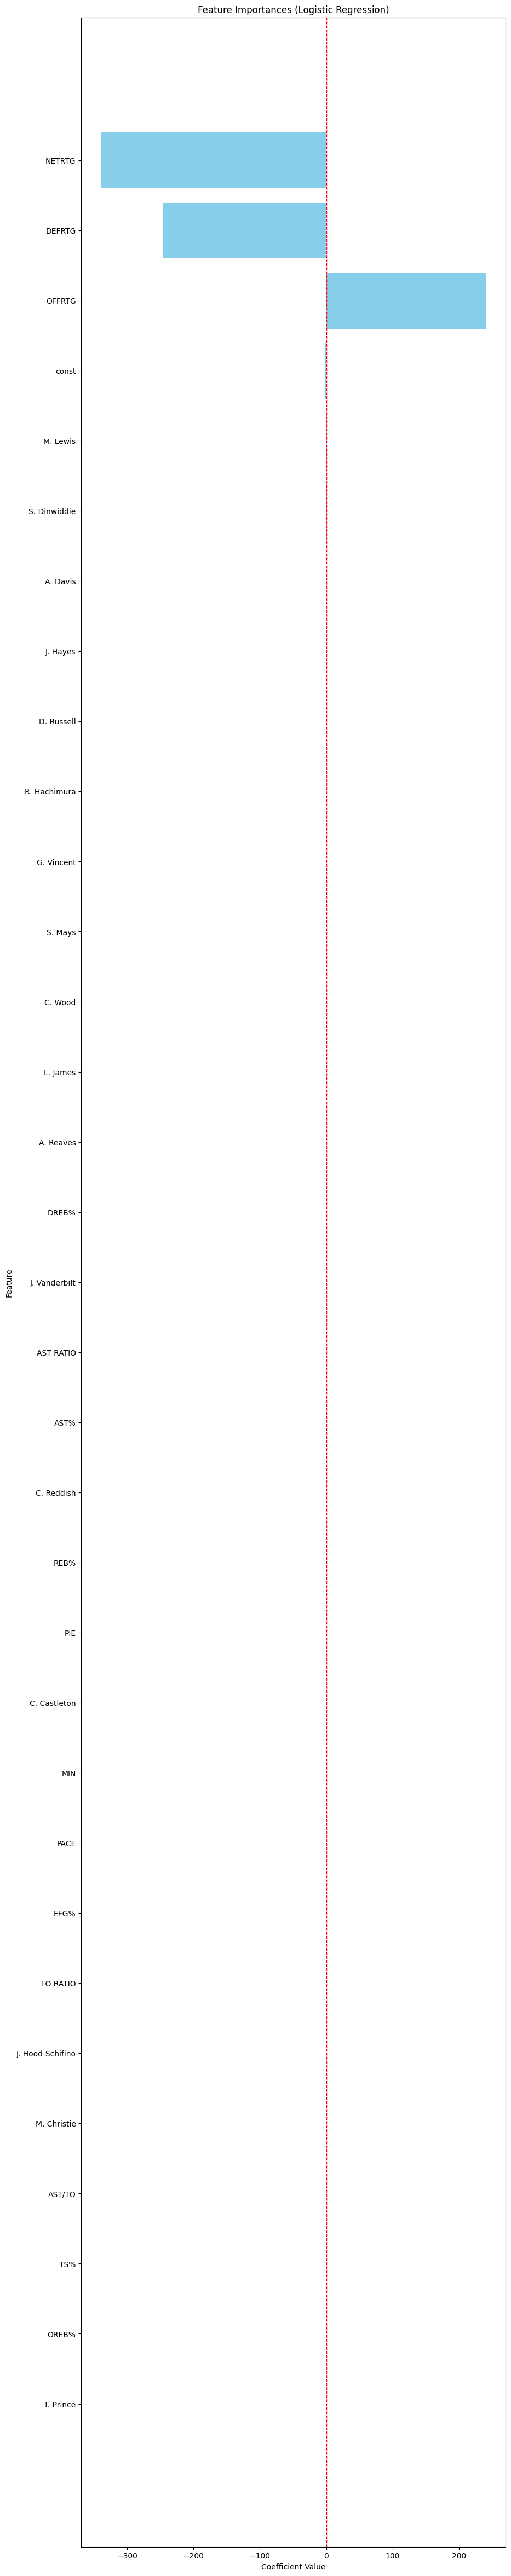

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature coefficients from the model
coefficients = logit_model.params  # Use `model.coef_` if using sklearn logistic regression

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    "Feature": coefficients.index,  # Feature names
    "Importance": coefficients.values  # Coefficients
}).sort_values(by="Importance", ascending=False, key=np.abs)  # Sort by absolute importance

# Plot feature importances
plt.figure(figsize=(10, 60))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances (Logistic Regression)")
plt.axvline(0, color="red", linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.gca().invert_yaxis()  # Most important feature on top
plt.show()


Confusion Matrix:
[[ 33  66]
 [ 32 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        99
           1       0.61      0.76      0.68       134

    accuracy                           0.58       233
   macro avg       0.56      0.55      0.54       233
weighted avg       0.56      0.58      0.56       233

F1 Score: 0.68
ROC AUC Score: 0.59
Precision: 0.61
Recall: 0.75


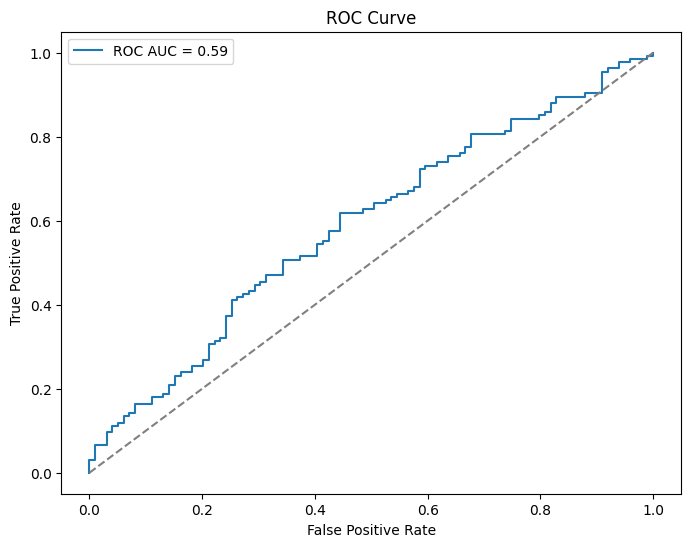

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X_final_dropped.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
29      S. Dinwiddie     0.646850    0.646850
30           S. Mays    -0.482479    0.482479
27          M. Lewis     0.475513    0.475513
15          A. Davis     0.414655    0.414655
2             DEFRTG    -0.277690    0.277690
22          J. Hayes     0.250050    0.250050
8              DREB%    -0.242898    0.242898
31         T. Prince    -0.231411    0.231411
20        D. Russell     0.203550    0.203550
6          AST RATIO     0.194215    0.194215
26       M. Christie    -0.189606    0.189606
4               AST%    -0.168527    0.168527
9               REB%     0.165755    0.165755
28      R. Hachimura     0.147181    0.147181
14               PIE    -0.132463    0.132463
21        G. Vincent     0.116476    0.116476
1             OFFRTG    -0.114629    0.114629
23  J. Hood-Schifino    -0.114539    0.114539
13              PACE    -0.113382    0.113382
0                MIN    -0.110398    0.110398
3             NETRTG     0.110364    0.110364
11              EFG%     0.084833    0.084833
19           C. Wood     0.069285    0.069285
10          TO RATIO     0.060122    0.060122
17      C. Castleton    -0.057292    0.057292
18        C. Reddish    -0.051772    0.051772
5             AST/TO     0.042318    0.042318
16         A. Reaves     0.018441    0.018441
7              OREB%    -0.016384    0.016384
25          L. James     0.013821    0.013821
12               TS%     0.006517    0.006517
24     J. Vanderbilt     0.006398    0.006398

### Decision Trees


Decision Tree Metrics:
Precision: 0.61
Recall (Sensitivity): 0.66
F1 Score: 0.63
AUC-ROC: 0.58
Log Loss: 0.69
Normalized Confusion Matrix: [[0.43434343 0.56565657]
 [0.34328358 0.65671642]]


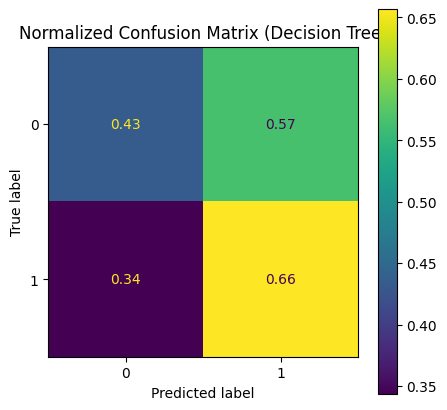

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Random Forest Metrics:
Precision: 0.63
Recall (Sensitivity): 0.62
F1 Score: 0.63
AUC-ROC: 0.57
Log Loss: 0.69
Normalized Confusion Matrix: [[0.51515152 0.48484848]
 [0.38059701 0.61940299]]


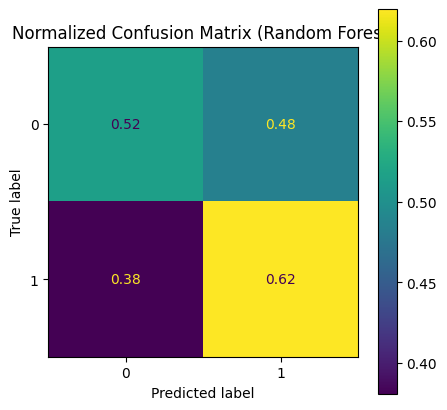

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}


XGBoost Metrics:
Precision: 0.59
Recall (Sensitivity): 0.81
F1 Score: 0.68
AUC-ROC: 0.57
Log Loss: 0.68
Normalized Confusion Matrix: [[0.24242424 0.75757576]
 [0.19402985 0.80597015]]


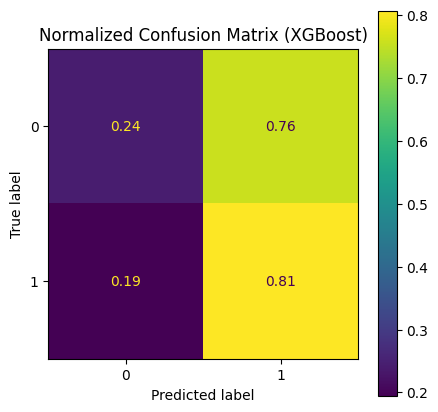

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    n_estimators=30,
    subsample=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Offensive Stats Only

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(offensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



### Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.57
Recall (Sensitivity): 0.78
F1 Score: 0.66
AUC-ROC: 0.56
Log Loss: 0.68
Normalized Confusion Matrix: [[0.2020202  0.7979798 ]
 [0.21641791 0.78358209]]


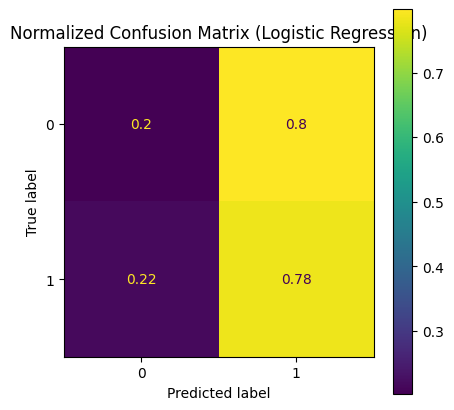

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 18  81]
 [ 29 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.18      0.25        99
           1       0.56      0.78      0.66       134

    accuracy                           0.53       233
   macro avg       0.47      0.48      0.45       233
weighted avg       0.49      0.53      0.48       233

F1 Score: 0.66
ROC AUC Score: 0.56
Precision: 0.57
Recall: 0.78


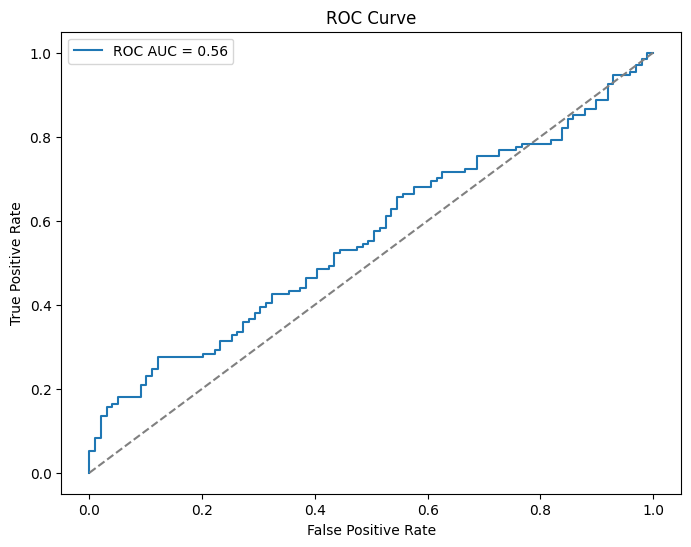

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': offensive_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
19          M. Lewis     0.683515    0.683515
21      S. Dinwiddie     0.668901    0.668901
7           A. Davis     0.450146    0.450146
22           S. Mays    -0.394306    0.394306
14          J. Hayes     0.246275    0.246275
23         T. Prince    -0.229289    0.229289
15  J. Hood-Schifino    -0.213013    0.213013
12        D. Russell     0.203970    0.203970
20      R. Hachimura     0.174093    0.174093
13        G. Vincent     0.154342    0.154342
18       M. Christie    -0.151009    0.151009
3               EFG%     0.147976    0.147976
0                MIN    -0.142816    0.142816
9       C. Castleton    -0.109243    0.109243
11           C. Wood     0.107741    0.107741
4                TS%    -0.075057    0.075057
17          L. James     0.058383    0.058383
10        C. Reddish    -0.057468    0.057468
5               PACE    -0.041556    0.041556
16     J. Vanderbilt     0.038737    0.038737
2              OREB%     0.031052    0.031052
6                PIE    -0.018557    0.018557
8          A. Reaves     0.014811    0.014811
1             OFFRTG     0.004792    0.004792

### Decision Trees


Decision Tree Metrics:
Precision: 0.60
Recall (Sensitivity): 0.61
F1 Score: 0.61
AUC-ROC: 0.57
Log Loss: 0.70
Normalized Confusion Matrix: [[0.45454545 0.54545455]
 [0.3880597  0.6119403 ]]


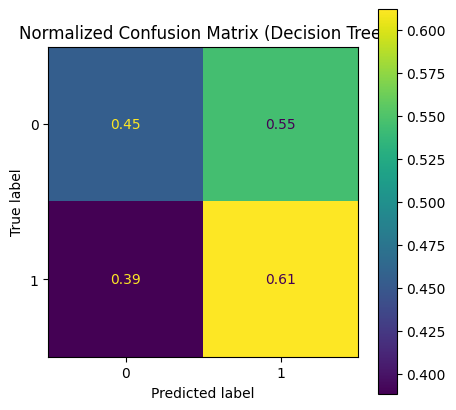

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.59
Recall (Sensitivity): 0.78
F1 Score: 0.67
AUC-ROC: 0.55
Log Loss: 0.69
Normalized Confusion Matrix: [[0.26262626 0.73737374]
 [0.21641791 0.78358209]]


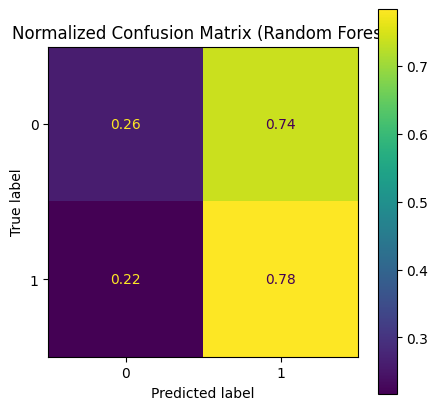

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.58
Recall (Sensitivity): 1.00
F1 Score: 0.73
AUC-ROC: 0.57
Log Loss: 0.68
Normalized Confusion Matrix: [[0. 1.]
 [0. 1.]]


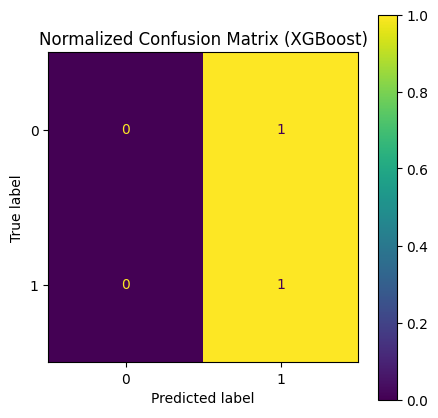

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=40,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Defensive Stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(defensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.650538
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  931
Model:                          Logit   Df Residuals:                      908
Method:                           MLE   Df Model:                           22
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.04516
Time:                        00:44:16   Log-Likelihood:                -605.65
converged:                       True   LL-Null:                       -634.29
Covariance Type:            nonrobust   LLR p-value:                 5.579e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2523      2.076     -0.603      0.546      -5.321       2.816
MIN        

### Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.61
Recall (Sensitivity): 0.77
F1 Score: 0.68
AUC-ROC: 0.60
Log Loss: 0.67
Normalized Confusion Matrix: [[0.33333333 0.66666667]
 [0.23134328 0.76865672]]


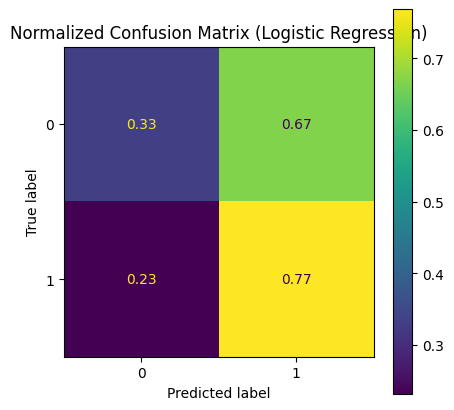

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 32  67]
 [ 29 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.32      0.40        99
           1       0.61      0.78      0.69       134

    accuracy                           0.59       233
   macro avg       0.57      0.55      0.54       233
weighted avg       0.57      0.59      0.56       233

F1 Score: 0.68
ROC AUC Score: 0.61
Precision: 0.61
Recall: 0.77


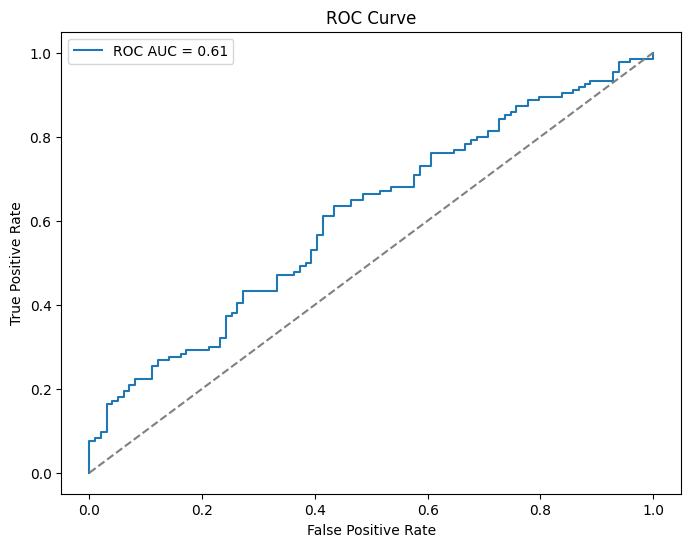

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': defensive_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
19      S. Dinwiddie     0.634255    0.634255
17          M. Lewis     0.516586    0.516586
20           S. Mays    -0.498066    0.498066
5           A. Davis     0.399768    0.399768
21         T. Prince    -0.276603    0.276603
1             DEFRTG    -0.261940    0.261940
12          J. Hayes     0.230408    0.230408
16       M. Christie    -0.226101    0.226101
3              DREB%    -0.209843    0.209843
13  J. Hood-Schifino    -0.196133    0.196133
10        D. Russell     0.186701    0.186701
4               REB%     0.166151    0.166151
18      R. Hachimura     0.103390    0.103390
7       C. Castleton    -0.099828    0.099828
11        G. Vincent     0.091374    0.091374
8         C. Reddish    -0.091020    0.091020
0                MIN    -0.086782    0.086782
9            C. Wood     0.059788    0.059788
2             NETRTG     0.048854    0.048854
6          A. Reaves    -0.037618    0.037618
15          L. James    -0.010697    0.010697
14     J. Vanderbilt    -0.001643    0.001643

### Decision Trees


Decision Tree Metrics:
Precision: 0.57
Recall (Sensitivity): 0.78
F1 Score: 0.66
AUC-ROC: 0.55
Log Loss: 1.00
Normalized Confusion Matrix: [[0.22222222 0.77777778]
 [0.2238806  0.7761194 ]]


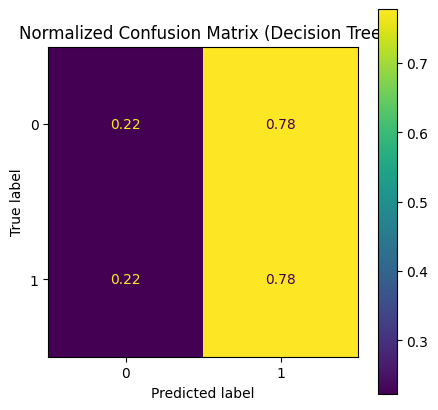

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.60
Recall (Sensitivity): 0.81
F1 Score: 0.69
AUC-ROC: 0.59
Log Loss: 0.67
Normalized Confusion Matrix: [[0.25252525 0.74747475]
 [0.18656716 0.81343284]]


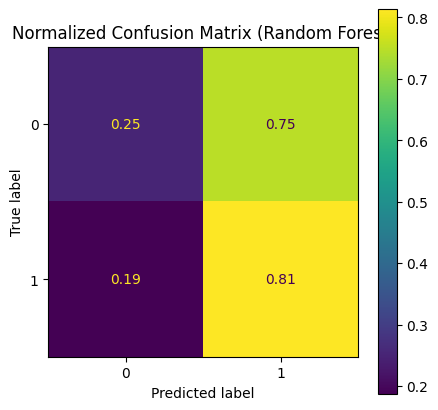

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=40,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.59
Recall (Sensitivity): 0.83
F1 Score: 0.69
AUC-ROC: 0.56
Log Loss: 0.68
Normalized Confusion Matrix: [[0.21212121 0.78787879]
 [0.17164179 0.82835821]]


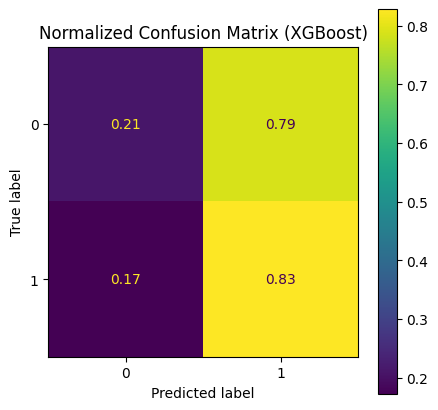

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Playmaking Stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(playmake_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



Optimization terminated successfully.
         Current function value: 0.658552
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  931
Model:                          Logit   Df Residuals:                      908
Method:                           MLE   Df Model:                           22
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.03340
Time:                        00:46:46   Log-Likelihood:                -613.11
converged:                       True   LL-Null:                       -634.29
Covariance Type:            nonrobust   LLR p-value:                  0.005645
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8774      2.088     -0.899      0.368      -5.969       2.214
MIN        

### Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20, 'subsample': 1.0}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.58
Recall (Sensitivity): 0.78
F1 Score: 0.67
AUC-ROC: 0.55
Log Loss: 0.68
Normalized Confusion Matrix: [[0.23232323 0.76767677]
 [0.21641791 0.78358209]]


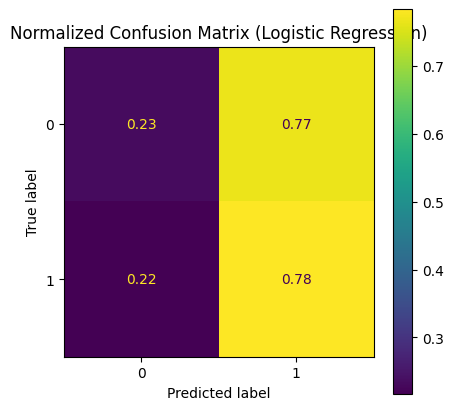

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 24  75]
 [ 29 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.24      0.32        99
           1       0.58      0.78      0.67       134

    accuracy                           0.55       233
   macro avg       0.52      0.51      0.49       233
weighted avg       0.53      0.55      0.52       233

F1 Score: 0.67
ROC AUC Score: 0.55
Precision: 0.58
Recall: 0.78


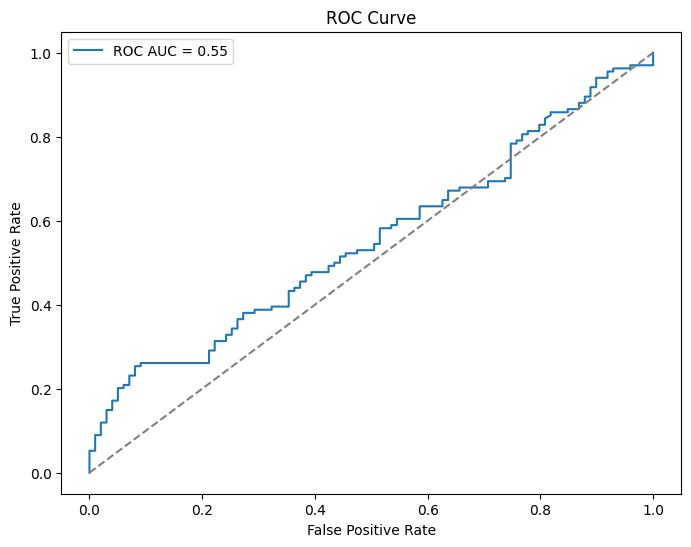

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': playmake_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
19      S. Dinwiddie     0.658513    0.658513
17          M. Lewis     0.654372    0.654372
5           A. Davis     0.449024    0.449024
20           S. Mays    -0.359537    0.359537
3          AST RATIO     0.290552    0.290552
1               AST%    -0.263557    0.263557
12          J. Hayes     0.237105    0.237105
21         T. Prince    -0.225080    0.225080
10        D. Russell     0.216189    0.216189
11        G. Vincent     0.187897    0.187897
18      R. Hachimura     0.177266    0.177266
13  J. Hood-Schifino    -0.176356    0.176356
0                MIN    -0.150882    0.150882
16       M. Christie    -0.140500    0.140500
7       C. Castleton    -0.138480    0.138480
9            C. Wood     0.102791    0.102791
4           TO RATIO     0.081208    0.081208
15          L. James     0.065505    0.065505
8         C. Reddish    -0.044942    0.044942
14     J. Vanderbilt     0.040930    0.040930
2             AST/TO     0.032677    0.032677
6          A. Reaves     0.024591    0.024591

### Decision Trees


Decision Tree Metrics:
Precision: 0.55
Recall (Sensitivity): 0.77
F1 Score: 0.64
AUC-ROC: 0.53
Log Loss: 0.68
Normalized Confusion Matrix: [[0.16161616 0.83838384]
 [0.23134328 0.76865672]]


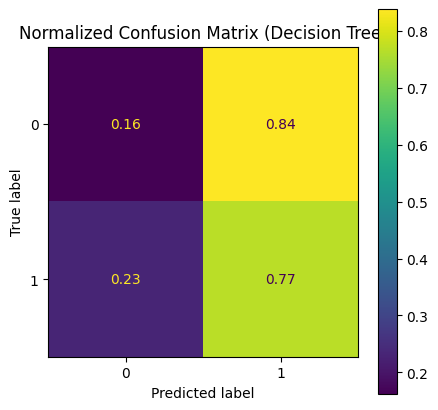

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.58
Recall (Sensitivity): 0.82
F1 Score: 0.68
AUC-ROC: 0.54
Log Loss: 0.69
Normalized Confusion Matrix: [[0.2020202  0.7979798 ]
 [0.17910448 0.82089552]]


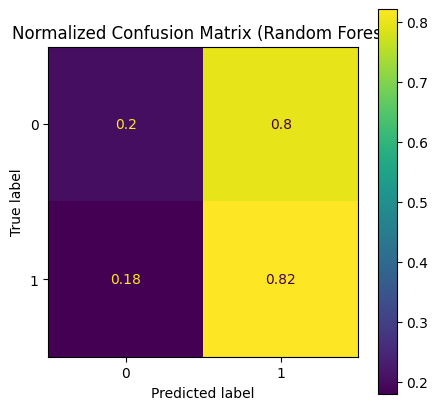

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=20,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.57
Recall (Sensitivity): 0.74
F1 Score: 0.64
AUC-ROC: 0.52
Log Loss: 0.70
Normalized Confusion Matrix: [[0.24242424 0.75757576]
 [0.26119403 0.73880597]]


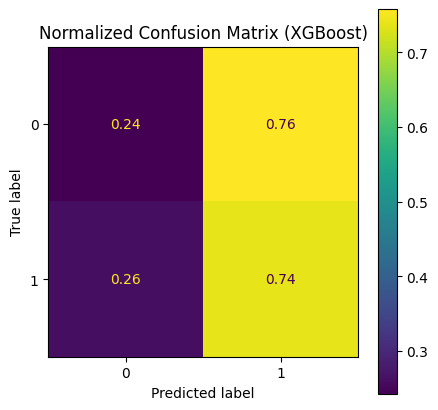

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=30,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# EXTRA

In [ ]:
# Updated model comparison DataFrame with all metrics rounded to 3 decimals
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        "XGBoost",
        "Neural Network"
    ],
    "Precision": [
        round(precision, 3),
        round(precision_tree, 3),
        round(precision_rf_model, 3),
        round(precision_xgb, 3)
    ],
    "Recall": [
        round(recall, 3),
        round(recall_tree, 3),
        round(recall_rf_model, 3),
        round(recall_xgb, 3)
    ],
    "F1 Score": [
        round(f1, 3),
        round(f1_tree, 3),
        round(f1_rf_model, 3)
        round(f1_xgb, 3)
    ],
    "AUC-ROC": [
        round(auc_roc, 3),
        round(auc_roc_tree, 3),
        round(auc_roc_rf_model, 3)
        round(auc_roc_xgb, 3)
    ],
    "Log Loss": [
        round(logloss, 3),
        round(logloss_tree, 3),
        round(logloss_rf_model, 3)
        round(logloss_xgb, 3)
    ]
})

# Display the updated DataFrame
print(model_comparison)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-93-f54d381128ac>, line 26)

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt


In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualizations
# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

# 2. Force Plot for the first prediction
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

# 3. Bar Plot for feature importance
shap.plots.bar(shap_values)

# 4. Dependence Plot for a specific feature
shap.dependence_plot('GP', shap_values.values, X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Logistic Regression with L1 Regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_prob_lasso = lasso_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L2 Regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_prob_ridge = ridge_model.predict_proba(X_test)[:, 1]

# Evaluate L1 and L2 models
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    logloss = log_loss(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred, normalize="true")

    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Log Loss: {logloss:.2f}")
    print(f"Normalized Confusion Matrix: \n{cm}")

    # Display normalized confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cmd.plot(ax=ax)
    plt.title(f"Normalized Confusion Matrix ({model_name})")
    plt.show()

evaluate_model(y_test, y_pred_lasso, y_pred_prob_lasso, "Lasso (L1)")
evaluate_model(y_test, y_pred_ridge, y_pred_prob_ridge, "Ridge (L2)")
